#### Input data: Running times of a matrix-matrix multiplication, given certain parameter combinations
Last 4 columns are execution times of 4 separate runs. So those are the labels.

First 14 columns are the features: various parameters you can set

Take the average of those 4 run times and create a single label

In [1]:
import pandas as pd

dataloc = "/home/tbrownex/data/test/"
inFile  = "sgemm_product.csv"
outFile = "data.csv"

In [2]:
df = pd.read_csv(dataloc+inFile)

In [3]:
# Create the Label: the average of the 4 run times
runTimes = ["Run1 (ms)", "Run2 (ms)", "Run3 (ms)", "Run4 (ms)"]
tmp = df.loc[: , runTimes]

df['MeanRunTime'] = tmp.mean(axis=1)

# Drop the individual run times
for col in runTimes: del df[col]

##### Data exploration

In [4]:
# See if there is any missing data
print("Any Nulls in the data? {}{}".format("\n", df.isnull().sum()))

Any Nulls in the data? 
MWG            0
NWG            0
KWG            0
MDIMC          0
NDIMC          0
MDIMA          0
NDIMB          0
KWI            0
VWM            0
VWN            0
STRM           0
STRN           0
SA             0
SB             0
MeanRunTime    0
dtype: int64


In [5]:
# See if there are any highly correlated features
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
tmp = so.loc[so>.2].loc[so<1.0]
print(tmp)

VWN          NWG            0.353763
NWG          VWN            0.353763
MWG          VWM            0.353763
VWM          MWG            0.353763
MWG          MeanRunTime    0.351810
MeanRunTime  MWG            0.351810
             NWG            0.320460
NWG          MeanRunTime    0.320460
MDIMC        MeanRunTime    0.221097
MeanRunTime  MDIMC          0.221097
NDIMC        MeanRunTime    0.214595
MeanRunTime  NDIMC          0.214595
NDIMC        MDIMC          0.209562
MDIMC        NDIMC          0.209562
NDIMB        VWN            0.202712
VWN          NDIMB          0.202712
VWM          MDIMA          0.202712
MDIMA        VWM            0.202712
dtype: float64


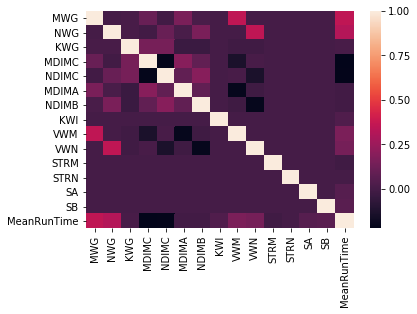

In [8]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
df.to_csv(dataloc+outFile, index=False)